<a href="https://colab.research.google.com/github/AkshatSharma-05/temp/blob/main/ChicagoCrimeArrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago Crime Arrest Prdiction

importing libraries and loading the dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Crimes-2025.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,14031536,JJ492764,11/17/2025 12:00:00 AM,013XX W 50TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,20.0,61.0,11,1168423.0,1871612.0,2025,11/24/2025 03:41:59 PM,41.803232,-87.657839,POINT (-87.657839043 41.803232296)
1,14033011,JJ494246,11/17/2025 12:00:00 AM,003XX S CANAL ST,0810,THEFT,OVER $500,OTHER (SPECIFY),False,True,...,34.0,28.0,06,1173192.0,1898678.0,2025,11/24/2025 03:41:59 PM,41.877399,-87.639547,POINT (-87.639547106 41.877399483)
2,14032537,JJ493742,11/17/2025 12:00:00 AM,069XX S SOUTH CHICAGO AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,CAR WASH,False,False,...,6.0,42.0,15,1181629.0,1859203.0,2025,11/24/2025 03:41:59 PM,41.768886,-87.609790,POINT (-87.609789756 41.768885854)
3,14032479,JJ493716,11/17/2025 12:00:00 AM,027XX W 68TH ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,OTHER (SPECIFY),False,False,...,16.0,66.0,02,1159381.0,1859440.0,2025,11/24/2025 03:41:59 PM,41.770021,-87.691334,POINT (-87.6913338 41.770020864)
4,14037571,JJ500032,11/17/2025 12:00:00 AM,027XX S WENTWORTH AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,11.0,34.0,11,NaN,NaN,2025,11/24/2025 03:41:59 PM,NaN,NaN,NaN


In [ ]:
df.shape

(209649, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209649 entries, 0 to 209648
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    209649 non-null  int64  
 1   Case Number           209649 non-null  object 
 2   Date                  209649 non-null  object 
 3   Block                 209649 non-null  object 
 4   IUCR                  209649 non-null  object 
 5   Primary Type          209649 non-null  object 
 6   Description           209649 non-null  object 
 7   Location Description  208790 non-null  object 
 8   Arrest                209649 non-null  bool   
 9   Domestic              209649 non-null  bool   
 10  Beat                  209649 non-null  int64  
 11  District              209649 non-null  int64  
 12  Ward                  209648 non-null  float64
 13  Community Area        209648 non-null  float64
 14  FBI Code              209649 non-null  object 
 15  

# Data Cleaning

## Data types

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
# df['Updated On'] = pd.to_datetime(df['Updated On'], errors = 'coerce')

In [ ]:
df['hour'] = df['Date'].dt.hour
df['dayofweek'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month

In [ ]:
df['FBI Code'] = pd.to_numeric(df['FBI Code'], errors='coerce')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209649 entries, 0 to 209648
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    209649 non-null  int64         
 1   Case Number           209649 non-null  object        
 2   Date                  209649 non-null  datetime64[ns]
 3   Block                 209649 non-null  object        
 4   IUCR                  209649 non-null  object        
 5   Primary Type          209649 non-null  object        
 6   Description           209649 non-null  object        
 7   Location Description  208790 non-null  object        
 8   Arrest                209649 non-null  bool          
 9   Domestic              209649 non-null  bool          
 10  Beat                  209649 non-null  int64         
 11  District              209649 non-null  int64         
 12  Ward                  209648 non-null  float64       
 13 

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,hour,dayofweek,month
0,14031536,JJ492764,2025-11-17,013XX W 50TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,1168423.0,1871612.0,2025,11/24/2025 03:41:59 PM,41.803232,-87.657839,POINT (-87.657839043 41.803232296),0,0,11
1,14033011,JJ494246,2025-11-17,003XX S CANAL ST,0810,THEFT,OVER $500,OTHER (SPECIFY),False,True,...,1173192.0,1898678.0,2025,11/24/2025 03:41:59 PM,41.877399,-87.639547,POINT (-87.639547106 41.877399483),0,0,11
2,14032537,JJ493742,2025-11-17,069XX S SOUTH CHICAGO AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,CAR WASH,False,False,...,1181629.0,1859203.0,2025,11/24/2025 03:41:59 PM,41.768886,-87.609790,POINT (-87.609789756 41.768885854),0,0,11
3,14032479,JJ493716,2025-11-17,027XX W 68TH ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,OTHER (SPECIFY),False,False,...,1159381.0,1859440.0,2025,11/24/2025 03:41:59 PM,41.770021,-87.691334,POINT (-87.6913338 41.770020864),0,0,11
4,14037571,JJ500032,2025-11-17,027XX S WENTWORTH AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2025,11/24/2025 03:41:59 PM,NaN,NaN,NaN,0,0,11


## Null values

In [ ]:
df.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,859
Arrest,0
Domestic,0


In [ ]:
df.drop('FBI Code', axis=1, inplace=True)

There aren't any significant null values

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0


In [ ]:
len(df)

208715

## Unique Values

In [ ]:
df.nunique()

,0
ID,208715
Case Number,208694
Date,108380
Block,27387
IUCR,334
Primary Type,31
Description,312
Location Description,130
Arrest,2
Domestic,2


In [ ]:
df.drop_duplicates(inplace = True)

# Visualizing the Data

/tmp/ipython-input-2603980857.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Arrest', 'Arrest'])


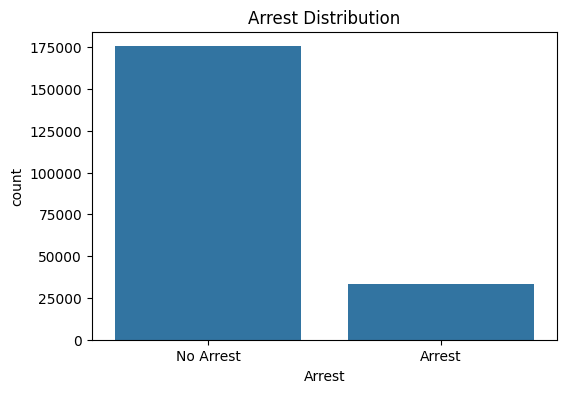

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = sns.countplot(x='Arrest', data=df)
ax.set_xticklabels(['No Arrest', 'Arrest'])
plt.title("Arrest Distribution")
plt.show()

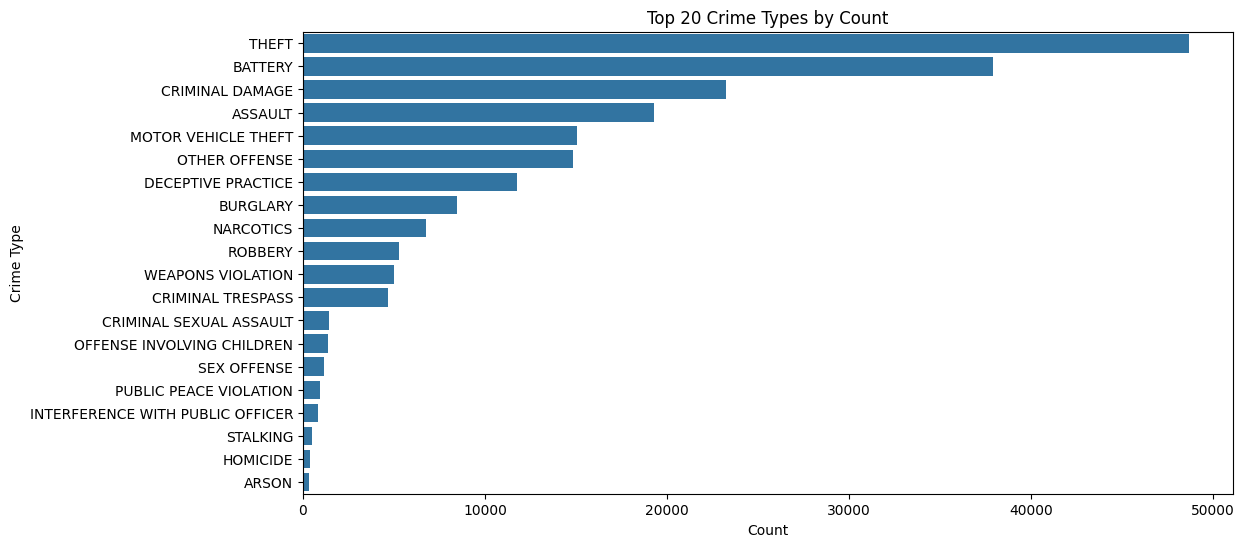

In [ ]:
top_n = 20
top_types = df['Primary Type'].value_counts().nlargest(top_n)

plt.figure(figsize=(12,6))
sns.barplot(x=top_types.values, y=top_types.index)
plt.title(f"Top {top_n} Crime Types by Count")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

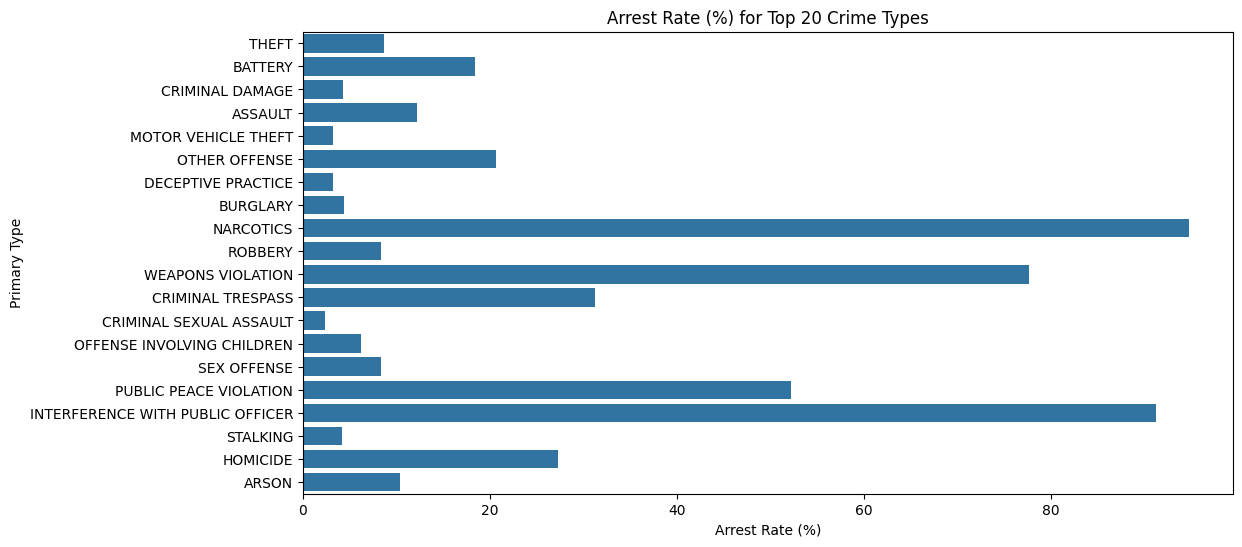

In [ ]:
type_stats = df.groupby('Primary Type').agg(total=('Arrest','size'), arrests=('Arrest','sum'))
type_stats['arrest_rate'] = type_stats['arrests'] / type_stats['total']
top_types_by_count = type_stats.sort_values('total', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_types_by_count['arrest_rate']*100, y=top_types_by_count.index)
plt.title("Arrest Rate (%) for Top 20 Crime Types")
plt.xlabel("Arrest Rate (%)")
plt.show()


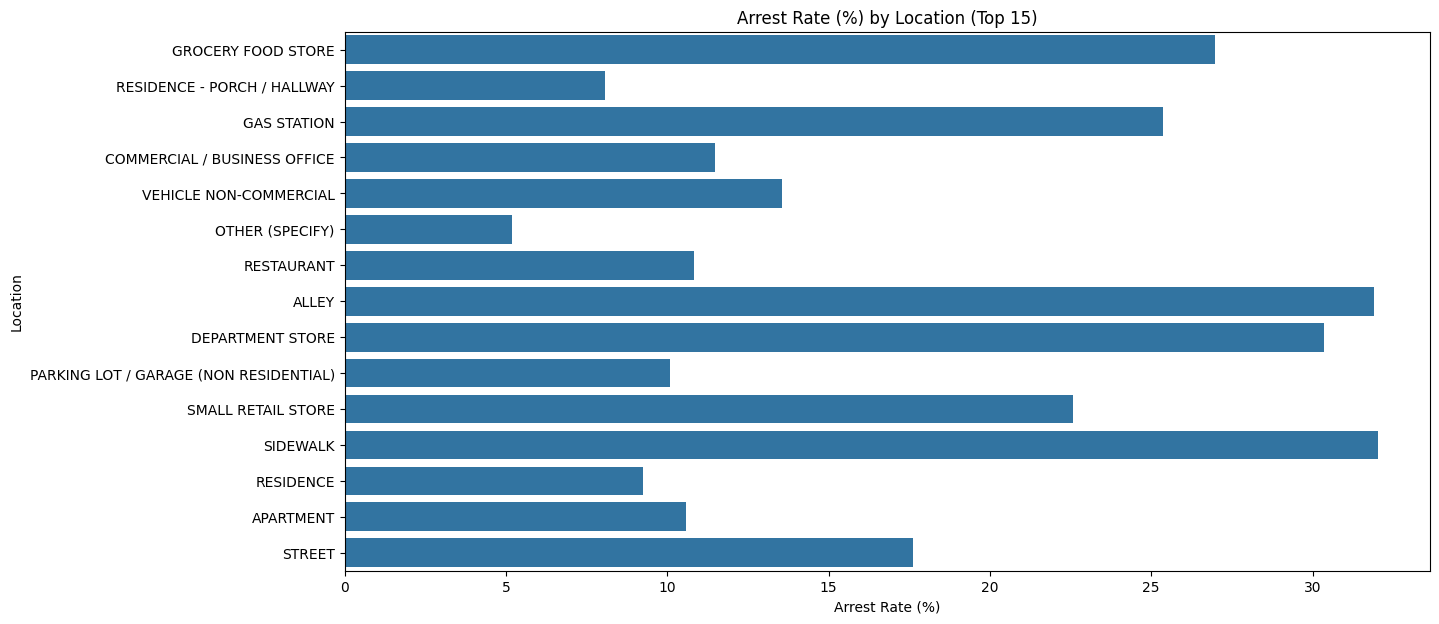

In [ ]:
top_loc = df['Location Description'].value_counts().nlargest(15).index

loc_stats = df[df['Location Description'].isin(top_loc)].groupby('Location Description').agg(total=('Arrest','size'), arrests=('Arrest','sum'))
loc_stats['arrest_rate'] = loc_stats['arrests'] / loc_stats['total']
loc_stats = loc_stats.sort_values('total')

plt.figure(figsize=(14,7))
sns.barplot(x=loc_stats['arrest_rate']*100, y=loc_stats.index)
plt.title("Arrest Rate (%) by Location (Top 15)")
plt.xlabel("Arrest Rate (%)")
plt.ylabel("Location")
plt.show()


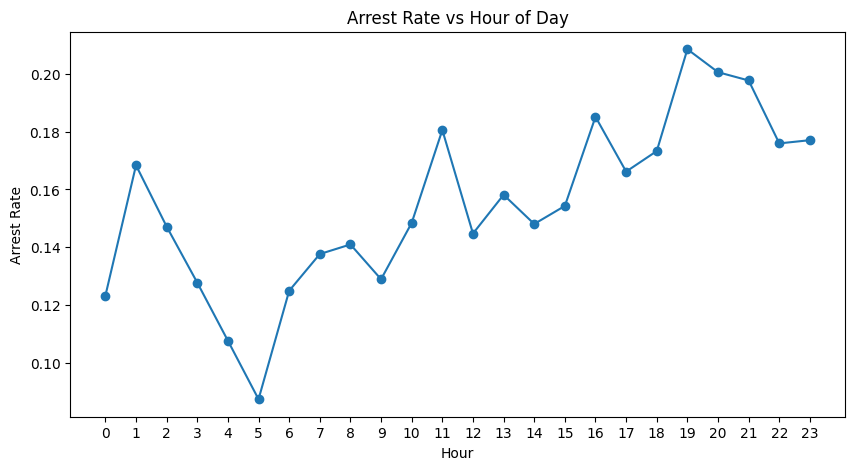

In [ ]:
hour_stats = df.groupby('hour').agg(total=('Arrest','size'),arrests=('Arrest','sum'))
hour_stats['arrest_rate'] = hour_stats['arrests'] / hour_stats['total']

plt.figure(figsize=(10,5))
sns.lineplot(x=hour_stats.index, y=hour_stats['arrest_rate'])
plt.scatter(hour_stats.index, hour_stats['arrest_rate'])
plt.xticks(range(0,24))
plt.title("Arrest Rate vs Hour of Day")
plt.ylabel("Arrest Rate")
plt.xlabel("Hour")
plt.show()


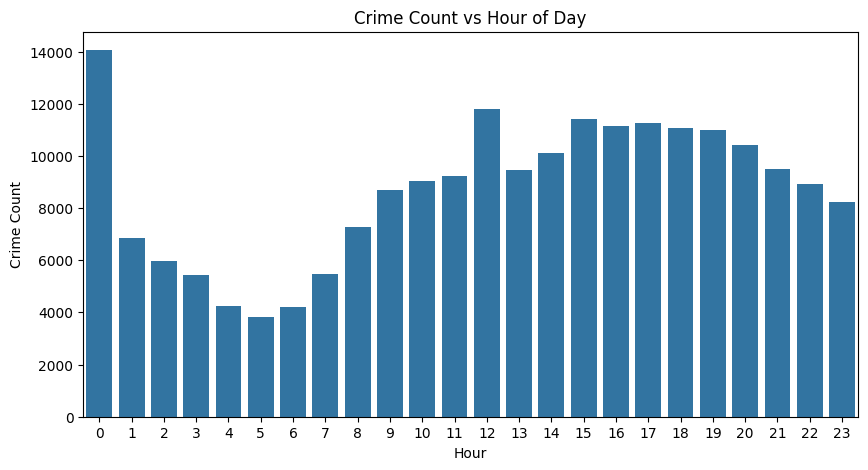

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=hour_stats.index, y=hour_stats['total'])
plt.title("Crime Count vs Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Crime Count")
plt.show()


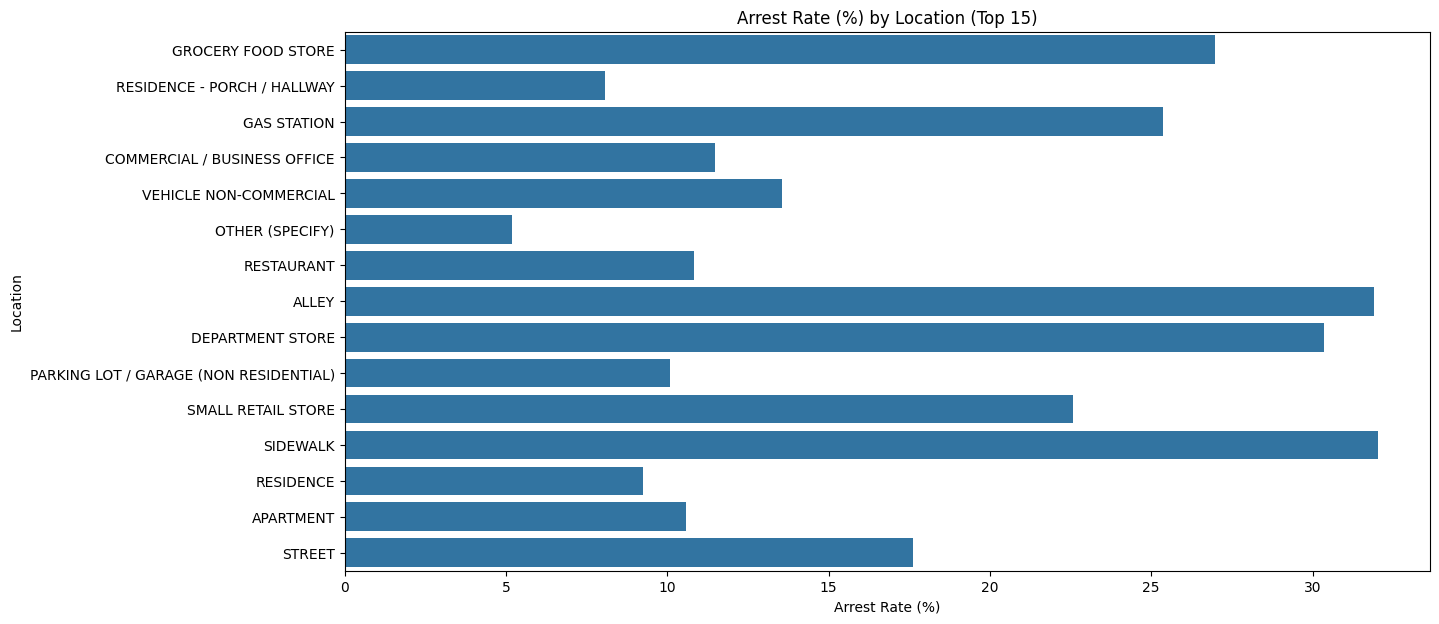

In [ ]:
top_loc = df['Location Description'].value_counts().nlargest(15).index

loc_stats = df[df['Location Description'].isin(top_loc)].groupby('Location Description').agg(total=('Arrest','size'),arrests=('Arrest','sum'))
loc_stats['arrest_rate'] = loc_stats['arrests'] / loc_stats['total']
loc_stats = loc_stats.sort_values('total')
plt.figure(figsize=(14,7))
sns.barplot(x=loc_stats['arrest_rate']*100, y=loc_stats.index)
plt.title("Arrest Rate (%) by Location (Top 15)")
plt.xlabel("Arrest Rate (%)")
plt.ylabel("Location")
plt.show()


## Some more pre processing

## Removing Columns that are not relevant to the model

In [ ]:
cols = ['IUCR', 'Block', 'ID', 'Case Number', 'Updated On', 'Year', 'Longitude', 'Latitude', 'Location', 'X Coordinate', 'Y Coordinate']
df.drop(columns = cols, axis=1, inplace = True)

In [ ]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,hour,dayofweek,month
0,2025-11-17,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,933,9,20.0,61.0,0,0,11
1,2025-11-17,THEFT,OVER $500,OTHER (SPECIFY),False,True,121,1,34.0,28.0,0,0,11
2,2025-11-17,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,CAR WASH,False,False,321,3,6.0,42.0,0,0,11
3,2025-11-17,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,OTHER (SPECIFY),False,False,831,8,16.0,66.0,0,0,11
5,2025-11-17,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2213,22,19.0,72.0,0,0,11


## Cleaning the object type to reduce some irregularities

In [ ]:
df['Primary Type'] = df['Primary Type'].str.strip().str.upper()
df['Location Description'] = df['Location Description'].str.strip().str.upper()
df['Description'] = df['Description'].str.strip().str.upper()

In [ ]:
df.nunique()

,0
Date,108380
Primary Type,31
Description,312
Location Description,130
Arrest,2
Domestic,2
Beat,274
District,23
Ward,50
Community Area,77


# Preparing the model

## From this we will seprate out most important features only. And also leave the features with high cardinality

In [ ]:
X = df[['Primary Type', 'Location Description', 'Domestic', 'District', 'hour', 'dayofweek', 'month']]
y = df['Arrest'].astype(int)

## Encoding the Categorical Features

In [ ]:
X = pd.get_dummies(X, drop_first=True)

## Splitting the dataset into Train(80%) and Test(20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=69)

# Training the model

## Baseline model

In [ ]:
model1 = LogisticRegression(max_iter=500, class_weight='balanced')
model1.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
y_pred = model1.predict(X_test)
y_prob = model1.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.94      0.73      0.83     43854
           1       0.36      0.77      0.49      8325

    accuracy                           0.74     52179
   macro avg       0.65      0.75      0.66     52179
weighted avg       0.85      0.74      0.77     52179

[[32195 11659]
 [ 1880  6445]]
AUC: 0.8417486004269421


## Using regularization (elasticnet)

In [ ]:
model2 = LogisticRegression(max_iter=2000, class_weight='balanced', penalty='l1', solver='liblinear')
model2.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, penalty='l1',
                   solver='liblinear')

In [ ]:
y_pred = model2.predict(X_test)
y_prob = model2.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     43854
           1       0.36      0.78      0.49      8325

    accuracy                           0.74     52179
   macro avg       0.65      0.76      0.66     52179
weighted avg       0.85      0.74      0.77     52179

[[32196 11658]
 [ 1861  6464]]
AUC: 0.8421291095446247


Only a little bit increase in performace

## Trying Feature scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

num_cols = ['hour', 'dayofweek', 'month']
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
model3 = LogisticRegression(max_iter=2000, class_weight='balanced', penalty='l1', solver='liblinear')
model3.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, penalty='l1',
                   solver='liblinear')

In [ ]:
y_pred = model3.predict(X_test_scaled)
y_prob = model3.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     43854
           1       0.36      0.78      0.49      8325

    accuracy                           0.74     52179
   macro avg       0.65      0.76      0.66     52179
weighted avg       0.85      0.74      0.77     52179

[[32195 11659]
 [ 1860  6465]]
AUC: 0.842131051560522


A little bit more increase in performance